In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
emails=pd.read_csv("emails.csv")
email_subject=pd.read_csv("email_subject.csv")
products=pd.read_csv("products.csv")
sales=pd.read_csv("sales.csv")

In [3]:
products

,product_id,model,modelyear,product_type,base_price,production_start_date,production_end_date
0,1,FioNex,2010,scooter,63998,3/3/2010,8/6/2012
1,2,FioNex Limited Edition,2011,scooter,127998,3/1/2011,30-03-2011
2,3,FioNex,2013,scooter,79998,1/5/2013,28-12-2018
3,4,DeltaPlus,2014,automobile,920000,23-06-2014,28-12-2018
4,5,Parker,2014,scooter,111998,23-06-2014,27-01-2015
5,6,Corpel,2015,automobile,524000,15-04-2015,1/10/2018
6,7,Sprint,2016,scooter,95998,10/10/2016,NaN
7,8,Sprint Limited Edition,2017,scooter,111998,15-02-2017,NaN
8,9,SigniaSafari,2017,automobile,280000,15-02-2017,NaN
9,10,Zelito800,2017,automobile,686000,15-02-2017,NaN


In [4]:
# creating a dataframe of products to store the data only of sprint and sprint LE
row = products.iloc[[6,7]]
print(row)

   product_id                   model  modelyear product_type  base_price  \
6           7                  Sprint       2016      scooter       95998   
7           8  Sprint Limited Edition       2017      scooter      111998   

  production_start_date production_end_date  
6            10/10/2016                 NaN  
7           15-02-2017                  NaN  


In [5]:
sales.head()

,customer_id,product_id,sales_transaction_date,channel,dealership_id
0,1,7,2017-07-19 08:38:00,internet,NaN
1,22,7,2017-08-14 09:59:00,dealership,20.0
2,145,7,2019-01-20 10:40:00,internet,NaN
3,289,7,2017-05-09 14:20:00,dealership,7.0
4,331,7,2019-05-21 20:03:00,dealership,4.0


In [6]:
products.isnull().sum()

product_id               0
model                    0
modelyear                0
product_type             0
base_price               0
production_start_date    0
production_end_date      6
dtype: int64

In [7]:
sales.isnull().sum()

customer_id                   0
product_id                    0
sales_transaction_date        0
channel                       0
dealership_id             21063
dtype: int64

In [8]:
#creating a dataframe SalesSP that contains sales data of Sprint  by filtering sales based on specified columns and values
Sales_SP = sales[(sales['product_id']==7)]
SP = Sales_SP.sort_values('sales_transaction_date')
SP.head()

,customer_id,product_id,sales_transaction_date,channel,dealership_id
5491,4319,7,2016-10-10 00:41:00,internet,NaN
3910,40250,7,2016-10-10 02:47:00,dealership,4.0
7249,35497,7,2016-10-10 04:21:00,dealership,2.0
6635,4553,7,2016-10-10 07:42:00,dealership,11.0
2123,11678,7,2016-10-10 09:21:00,internet,NaN


In [9]:
# Subsetting 'sales' for 'sprint limited Edition'
Sales_SP_LE = sales[(sales['product_id']==8)]
SPL = Sales_SP_LE.sort_values('sales_transaction_date')
SPL.head()

,customer_id,product_id,sales_transaction_date,channel,dealership_id
9342,33769,8,2017-02-15 01:49:00,internet,NaN
12611,10118,8,2017-02-15 09:42:00,internet,NaN
7760,19045,8,2017-02-15 10:48:00,internet,NaN
11394,27048,8,2017-02-15 12:22:00,internet,NaN
10207,5163,8,2017-02-15 13:51:00,internet,NaN


In [10]:
# Need to convert "sales_date" to datetime object, and converting to only date (and back into object) 
Sales_SP['sales_transaction_date']=pd.to_datetime(Sales_SP['sales_transaction_date']).dt.date

Sales_SP_LE['sales_transaction_date']=pd.to_datetime(Sales_SP_LE['sales_transaction_date']).dt.date



In [11]:
Sales_SP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7328 entries, 0 to 7327
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             7328 non-null   int64  
 1   product_id              7328 non-null   int64  
 2   sales_transaction_date  7328 non-null   object 
 3   channel                 7328 non-null   object 
 4   dealership_id           4044 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 343.5+ KB


In [12]:
#Grouping the dataframe Sales_SP and Sales_SP_LE  according to the transaction_date  and counting such rows using size() to find number of sales on each day
Sprint = Sales_SP.groupby("sales_transaction_date").size().reset_index(name='sales')

Sprint_LE = Sales_SP_LE.groupby("sales_transaction_date").size().reset_index(name='sales')



In [13]:
# We only need to take the  (21 days) data to compare the sales of the 'sprint' and 'sprint limited'
sprint_1 = Sprint[0:21]
sprint_2 = Sprint_LE[0:21]

# Analyzing the 7- day rolling period

In [14]:
# Adding a column 'day no.' for better representation and resetting index
sprint_1["day no."]=sprint_1.index+1

sprint_1.set_index("day no.", inplace=True)

In [15]:
# Renaming the 'sales' column

sprint_1.rename(columns={"sales":"sales per day of Sprint"}, inplace=True);sprint_1

,sales_transaction_date,sales per day of Sprint
day no.,,
1,2016-10-10,9
2,2016-10-11,6
3,2016-10-12,10
4,2016-10-13,10
5,2016-10-14,5
6,2016-10-15,10
7,2016-10-16,14
8,2016-10-17,9
9,2016-10-18,11


In [16]:
# Calculating the rolling 7 day volume of sales; since we're performing the operation on "sales per day", no need to mention axis=1

# Calculating previous rolling 7 day volume by shifting our rolling calculation by 1 row
sprint_1["7 day cumulative sales of sprint"]=sprint_1["sales per day of Sprint"].rolling(window=7, min_periods=7).sum()

sprint_1["prior period sales of sprint"]=sprint_1["sales per day of Sprint"].shift(1).rolling(window=7, min_periods=7).sum()

In [17]:
sprint_1

,sales_transaction_date,sales per day of Sprint,7 day cumulative sales of sprint,prior period sales of sprint
day no.,,,,
1,2016-10-10,9,NaN,NaN
2,2016-10-11,6,NaN,NaN
3,2016-10-12,10,NaN,NaN
4,2016-10-13,10,NaN,NaN
5,2016-10-14,5,NaN,NaN
6,2016-10-15,10,NaN,NaN
7,2016-10-16,14,64.0,NaN
8,2016-10-17,9,64.0,64.0
9,2016-10-18,11,69.0,64.0


In [18]:
# Calculating percentage growth/decline in sales

sprint_1["% growth/decline in sales of sprint"]=((sprint_1["7 day cumulative sales of sprint"]-sprint_1["prior period sales of sprint"])/sprint_1["prior period sales of sprint"])*100

In [19]:
sprint_1

,sales_transaction_date,sales per day of Sprint,7 day cumulative sales of sprint,prior period sales of sprint,% growth/decline in sales of sprint
day no.,,,,,
1,2016-10-10,9,NaN,NaN,NaN
2,2016-10-11,6,NaN,NaN,NaN
3,2016-10-12,10,NaN,NaN,NaN
4,2016-10-13,10,NaN,NaN,NaN
5,2016-10-14,5,NaN,NaN,NaN
6,2016-10-15,10,NaN,NaN,NaN
7,2016-10-16,14,64.0,NaN,NaN
8,2016-10-17,9,64.0,64.0,0.000000
9,2016-10-18,11,69.0,64.0,7.812500


# Analyzing the 7- day rolling period Sprint LE

In [20]:
# Adding a column 'day no.' for better representation and resetting index

sprint_2["day no."]=sprint_2.index+1

sprint_2.set_index("day no.", inplace=True)

In [21]:
sprint_2.rename(columns={"sales":"sales per day of sprint LE"}, inplace=True);sprint_2

,sales_transaction_date,sales per day of sprint LE
day no.,,
1,2017-02-15,6
2,2017-02-16,2
3,2017-02-17,1
4,2017-02-18,4
5,2017-02-19,5
6,2017-02-20,6
7,2017-02-21,5
8,2017-02-22,4
9,2017-02-23,6


In [22]:
# Calculating the rolling 7 day volume of sales; since we're performing the operation on "sales per day", no need to mention axis=1

# Calculating previous rolling 7 day volume by shifting our rolling calculation by 1 row

sprint_2["7 day cumulative sales of sprint LE"]=sprint_2["sales per day of sprint LE"].rolling(window=7, min_periods=7).sum()

sprint_2["prior period sales of sprint LE"]=sprint_2["sales per day of sprint LE"].shift(1).rolling(window=7, min_periods=7).sum()

In [23]:
sprint_2

,sales_transaction_date,sales per day of sprint LE,7 day cumulative sales of sprint LE,prior period sales of sprint LE
day no.,,,,
1,2017-02-15,6,NaN,NaN
2,2017-02-16,2,NaN,NaN
3,2017-02-17,1,NaN,NaN
4,2017-02-18,4,NaN,NaN
5,2017-02-19,5,NaN,NaN
6,2017-02-20,6,NaN,NaN
7,2017-02-21,5,29.0,NaN
8,2017-02-22,4,27.0,29.0
9,2017-02-23,6,31.0,27.0


In [24]:
# Calculating percentage growth/decline in sales

sprint_2["% growth/decline in sales of sprint LE"]=((sprint_2["7 day cumulative sales of sprint LE"]-sprint_2["prior period sales of sprint LE"])/sprint_2["prior period sales of sprint LE"])*100

In [25]:
sprint_2

,sales_transaction_date,sales per day of sprint LE,7 day cumulative sales of sprint LE,prior period sales of sprint LE,% growth/decline in sales of sprint LE
day no.,,,,,
1,2017-02-15,6,NaN,NaN,NaN
2,2017-02-16,2,NaN,NaN,NaN
3,2017-02-17,1,NaN,NaN,NaN
4,2017-02-18,4,NaN,NaN,NaN
5,2017-02-19,5,NaN,NaN,NaN
6,2017-02-20,6,NaN,NaN,NaN
7,2017-02-21,5,29.0,NaN,NaN
8,2017-02-22,4,27.0,29.0,-6.896552
9,2017-02-23,6,31.0,27.0,14.814815


In [26]:
# Concatenating the two dataframes into a single one along column axis 

growth_comp=pd.concat([sprint_1, sprint_2], axis="columns"); growth_comp

,sales_transaction_date,sales per day of Sprint,7 day cumulative sales of sprint,prior period sales of sprint,% growth/decline in sales of sprint,sales_transaction_date,sales per day of sprint LE,7 day cumulative sales of sprint LE,prior period sales of sprint LE,% growth/decline in sales of sprint LE
day no.,,,,,,,,,,
1,2016-10-10,9,NaN,NaN,NaN,2017-02-15,6,NaN,NaN,NaN
2,2016-10-11,6,NaN,NaN,NaN,2017-02-16,2,NaN,NaN,NaN
3,2016-10-12,10,NaN,NaN,NaN,2017-02-17,1,NaN,NaN,NaN
4,2016-10-13,10,NaN,NaN,NaN,2017-02-18,4,NaN,NaN,NaN
5,2016-10-14,5,NaN,NaN,NaN,2017-02-19,5,NaN,NaN,NaN
6,2016-10-15,10,NaN,NaN,NaN,2017-02-20,6,NaN,NaN,NaN
7,2016-10-16,14,64.0,NaN,NaN,2017-02-21,5,29.0,NaN,NaN
8,2016-10-17,9,64.0,64.0,0.000000,2017-02-22,4,27.0,29.0,-6.896552
9,2016-10-18,11,69.0,64.0,7.812500,2017-02-23,6,31.0,27.0,14.814815


In [27]:
# Dropping the unnecessary columns along column axis using index 

growth_comp=growth_comp.drop(growth_comp.columns[[0,1,2,3,5,6,7,8]], axis=1)

In [28]:
growth_comp

,% growth/decline in sales of sprint,% growth/decline in sales of sprint LE
day no.,,
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,0.000000,-6.896552
9,7.812500,14.814815


<function matplotlib.pyplot.show(close=None, block=None)>

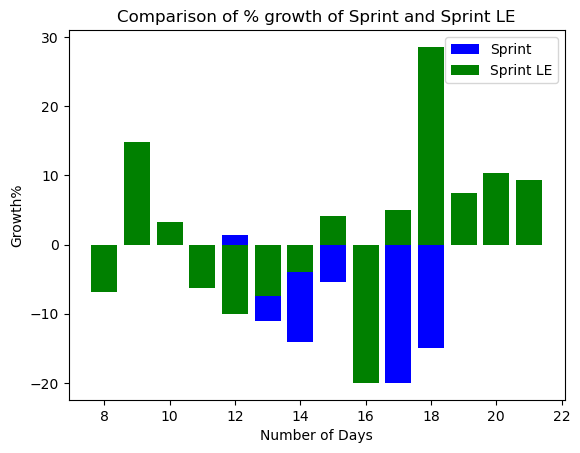

In [29]:
# Creating a stacked bar plot to highlight the % growth/decline of Sprint and Sprint LE

plt.bar(growth_comp.index,growth_comp["% growth/decline in sales of sprint"],label='Sprint',color='blue')
plt.bar(growth_comp.index,growth_comp["% growth/decline in sales of sprint LE"],label='Sprint LE',color='green')
plt.xlabel('Number of Days')
plt.ylabel('Growth%')
plt.legend()
plt.title('Comparison of % growth of Sprint and Sprint LE')
plt.rcParams['figure.figsize']=[10,10]
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

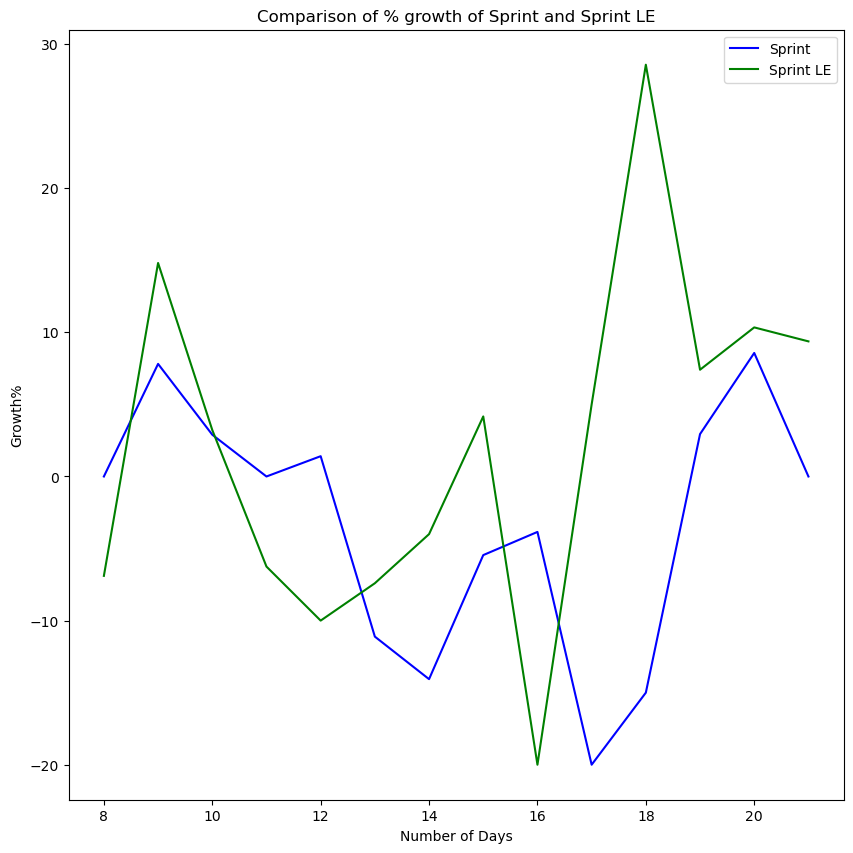

In [30]:
# Creating a line plot 

plt.plot(growth_comp.index,growth_comp["% growth/decline in sales of sprint"],label='Sprint',color='blue')
plt.plot(growth_comp.index,growth_comp["% growth/decline in sales of sprint LE"],label='Sprint LE',color='green')
plt.xlabel('Number of Days')
plt.ylabel('Growth%')
plt.legend()
plt.title('Comparison of % growth of Sprint and Sprint LE')
plt.rcParams['figure.figsize']=[10,10]
plt.show

Inference: 

- The hypothesis that the launch date had an effect on the sales has come true. The 'Sprint LE' registered significantly higher growth percentage compared to 'Sprint', while both achieved similar negative growth, 'Sprint LE' outperfromed 'Sprint' in this 21 day range.  

#  Analysing the Emails
*As a second step, we are investigating if the email campaign for Sprint Scooters have had impact results to draw customer attention by figuring out the Click-Through Rate and the Email Opening Rate and comparing them with benchmark values.*

In [31]:
emails

,email_id,customer_id,opened,clicked,bounced,sent_date,opened_date,clicked_date,email_subject_id
0,1,18,f,f,f,2011-01-03 15:00:00,NaN,NaN,6
1,2,30,f,f,f,2011-01-03 15:00:00,NaN,NaN,6
2,3,41,t,f,f,2011-01-03 15:00:00,04-01-2011 10:41,NaN,6
3,4,52,f,f,f,2011-01-03 15:00:00,NaN,NaN,6
4,5,59,f,f,f,2011-01-03 15:00:00,NaN,NaN,6
...,...,...,...,...,...,...,...,...,...
418153,418154,49996,f,f,f,2019-01-07 15:00:00,NaN,NaN,3
418154,418155,49997,t,f,f,2019-01-07 15:00:00,08-01-2019 17:30,NaN,3
418155,418156,49998,f,f,f,2019-01-07 15:00:00,NaN,NaN,3
418156,418157,49999,t,f,f,2019-01-07 15:00:00,08-01-2019 13:11,NaN,3


In [32]:
emails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418158 entries, 0 to 418157
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   email_id          418158 non-null  int64 
 1   customer_id       418158 non-null  int64 
 2   opened            418158 non-null  object
 3   clicked           418158 non-null  object
 4   bounced           418158 non-null  object
 5   sent_date         418158 non-null  object
 6   opened_date       83579 non-null   object
 7   clicked_date      10064 non-null   object
 8   email_subject_id  418158 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 28.7+ MB


In [33]:
email_subject

,email_subject_id,email_subject
0,1,25% off all EVs. It's a Christmas Time
1,2,A Brand New Scooter...and Car
2,3,"A New Year, And Some New EVs"
3,4,An Electric Car for a New Age
4,5,"Green Cars , Green Friday Offer"
5,6,Introducing A Limited Edition
6,7,Sprint Up your Ride
7,8,Save the Planet with some Holiday Savings
8,9,Take out your Electric Scooter for Holiday
9,10,The 2013 FioNex Scooter is Here


In [34]:
# Converting the 'sent_date' to datetime, and then using dt.date to convert into only date (object)
# Sorting email according to sent date
emails["sent_date"]=pd.to_datetime(emails["sent_date"]).dt.date
emails.sort_values('sent_date', inplace=True)

In [35]:
emails

,email_id,customer_id,opened,clicked,bounced,sent_date,opened_date,clicked_date,email_subject_id
0,1,18,f,f,f,2011-01-03,NaN,NaN,6
2805,2806,33757,f,f,f,2011-01-03,NaN,NaN,6
2806,2807,33768,f,f,f,2011-01-03,NaN,NaN,6
2807,2808,33778,f,f,f,2011-01-03,NaN,NaN,6
2808,2809,33817,f,f,f,2011-01-03,NaN,NaN,6
...,...,...,...,...,...,...,...,...,...
386535,386536,16691,f,f,f,2019-01-07,NaN,NaN,3
386536,386537,16692,f,f,f,2019-01-07,NaN,NaN,3
386537,386538,16693,f,f,f,2019-01-07,NaN,NaN,3
386528,386529,16684,f,f,f,2019-01-07,NaN,NaN,3


In [36]:
emails.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418158 entries, 0 to 418157
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   email_id          418158 non-null  int64 
 1   customer_id       418158 non-null  int64 
 2   opened            418158 non-null  object
 3   clicked           418158 non-null  object
 4   bounced           418158 non-null  object
 5   sent_date         418158 non-null  object
 6   opened_date       83579 non-null   object
 7   clicked_date      10064 non-null   object
 8   email_subject_id  418158 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 31.9+ MB


In [37]:
# Converting the 'sent_date' to datetime object for future use and calculations

emails["sent_date"]=pd.to_datetime(emails["sent_date"])

In [38]:
# Email data specifically for 'sprint' scooters

emails_sprint=emails[emails["email_subject_id"]==7]

In [39]:
emails_sprint

,email_id,customer_id,opened,clicked,bounced,sent_date,opened_date,clicked_date,email_subject_id
198116,198117,33216,f,f,f,2016-09-21,NaN,NaN,7
198114,198115,33213,f,f,f,2016-09-21,NaN,NaN,7
198113,198114,33212,t,f,f,2016-09-21,22-09-2016 10:44,NaN,7
198115,198116,33214,f,f,f,2016-09-21,NaN,NaN,7
198096,198097,33192,f,f,f,2016-09-21,NaN,NaN,7
...,...,...,...,...,...,...,...,...,...
186423,186424,16641,f,f,f,2016-09-21,NaN,NaN,7
186424,186425,16643,t,f,f,2016-09-21,22-09-2016 12:15,NaN,7
186425,186426,16644,f,f,f,2016-09-21,NaN,NaN,7
186426,186427,16646,t,f,f,2016-09-21,22-09-2016 08:25,NaN,7


In [40]:
# The sprint model started on 10-10-2016, the campaign started 2 months back

emails_sprint.sort_values("sent_date", inplace=True)

In [41]:
emails_sprint

,email_id,customer_id,opened,clicked,bounced,sent_date,opened_date,clicked_date,email_subject_id
198116,198117,33216,f,f,f,2016-09-21,NaN,NaN,7
174750,174751,21,f,f,f,2016-09-21,NaN,NaN,7
174736,174737,2,f,f,f,2016-09-21,NaN,NaN,7
174737,174738,5,t,f,f,2016-09-21,22-09-2016 10:12,NaN,7
174738,174739,6,f,f,f,2016-09-21,NaN,NaN,7
...,...,...,...,...,...,...,...,...,...
209791,209792,49982,f,f,f,2016-09-21,NaN,NaN,7
209790,209791,49981,f,f,f,2016-09-21,NaN,NaN,7
209772,209773,49951,f,f,f,2016-09-21,NaN,NaN,7
209795,209796,49990,f,f,f,2016-09-21,NaN,NaN,7


In [42]:
# All the emails regarding the promotion of 'sprint' scooter was sent to the 35067 customers on 21-09-2016

emails_sprint["sent_date"].value_counts()

2016-09-21    35067
Name: sent_date, dtype: int64

In [43]:
# Separating the main dataframe "emails" using the date range of 2 months marketing campaign

# Since production started on 10-10-2016, I backtraced the 2 months duration i.e. 60 days, which comes to 10-8-2016

emails_sprint_date=emails.loc[(emails["sent_date"]> "2016-08-10") & (emails["sent_date"]<  "2016-10-10")]

In [44]:
emails_sprint_date


,email_id,customer_id,opened,clicked,bounced,sent_date,opened_date,clicked_date,email_subject_id
198116,198117,33216,f,f,f,2016-09-21,NaN,NaN,7
198114,198115,33213,f,f,f,2016-09-21,NaN,NaN,7
198113,198114,33212,t,f,f,2016-09-21,22-09-2016 10:44,NaN,7
198115,198116,33214,f,f,f,2016-09-21,NaN,NaN,7
198096,198097,33192,f,f,f,2016-09-21,NaN,NaN,7
...,...,...,...,...,...,...,...,...,...
186423,186424,16641,f,f,f,2016-09-21,NaN,NaN,7
186424,186425,16643,t,f,f,2016-09-21,22-09-2016 12:15,NaN,7
186425,186426,16644,f,f,f,2016-09-21,NaN,NaN,7
186426,186427,16646,t,f,f,2016-09-21,22-09-2016 08:25,NaN,7


In [45]:
# Counting the f & t of bounced emails

emails_sprint["bounced"].value_counts()

f    34942
t      125
Name: bounced, dtype: int64

In [46]:
# Counting the f & t of clicked emails

emails_sprint["clicked"].value_counts()

f    34219
t      848
Name: clicked, dtype: int64

In [47]:
# Counting the f & t of opened emails

emails_sprint["opened"].value_counts()

f    28072
t     6995
Name: opened, dtype: int64

In [48]:
# click_rate = emails clicked (t)/net emails        net emails = total emails - emails bounced

click_rate=848/(35067-125)

print(click_rate*100)

2.426878827771736


In [49]:
# email_opening_rate = emails opened(t)/net emails   net emails = total emails - emails bounced

email_opening_rate=6995/(35067-125)

print(email_opening_rate*100)

20.018888443706714


In [50]:
# Creating comparison_table by first creating a list of lists, and then converting into dataframe and assigning column and index names

data = [[click_rate*100,8], [email_opening_rate*100,18]]

comparison_table=pd.DataFrame(data, columns=["Calculated","Industry Standard"], index=["Click Rate","E-mail Opening Rate"])

In [51]:
comparison_table

,Calculated,Industry Standard
Click Rate,2.426879,8
E-mail Opening Rate,20.018888,18


In [52]:
# Created a small if-else loop; 

if(click_rate*100)>18 and (email_opening_rate*100)>8:
    print("Campaign is a success")
else:
    print("Campaign is a failure")

Campaign is a failure
